In [710]:
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

%matplotlib inline

In [711]:
train=pd.read_csv("covid_19_india.csv")
test=pd.read_csv("covid_19_indias.csv")
train.head()

,Sno,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,Kerala,1,0,0,0,1
1,2,31/01/20,Kerala,1,0,0,0,1
2,3,01/02/20,Kerala,2,0,0,0,2
3,4,02/02/20,Kerala,3,0,0,0,3
4,5,03/02/20,Kerala,3,0,0,0,3


In [712]:
test.head()

,Snos,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,01/08/20,Himachal Pradesh,1,0,0,0,NaN
1,2,02/08/19,Himachal Pradesh,1,0,0,0,NaN
2,3,03/08/20,Himachal Pradesh,2,0,0,0,NaN
3,4,04/08/20,Himachal Pradesh,3,0,0,0,NaN
4,5,05/08/20,Himachal Pradesh,3,0,0,0,NaN


In [713]:
train.shape

(3819, 8)

In [714]:
test.shape

(29, 8)

In [715]:
train.isnull().sum()

Sno                         0
Date                        0
State                       0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [716]:
test.isnull().sum()

Snos                         0
Date                         0
State                        0
ConfirmedIndianNational      0
ConfirmedForeignNational     0
Cured                        0
Deaths                       0
Confirmed                   29
dtype: int64

In [741]:
ID=train["Sno"]
FID=test["Date"]

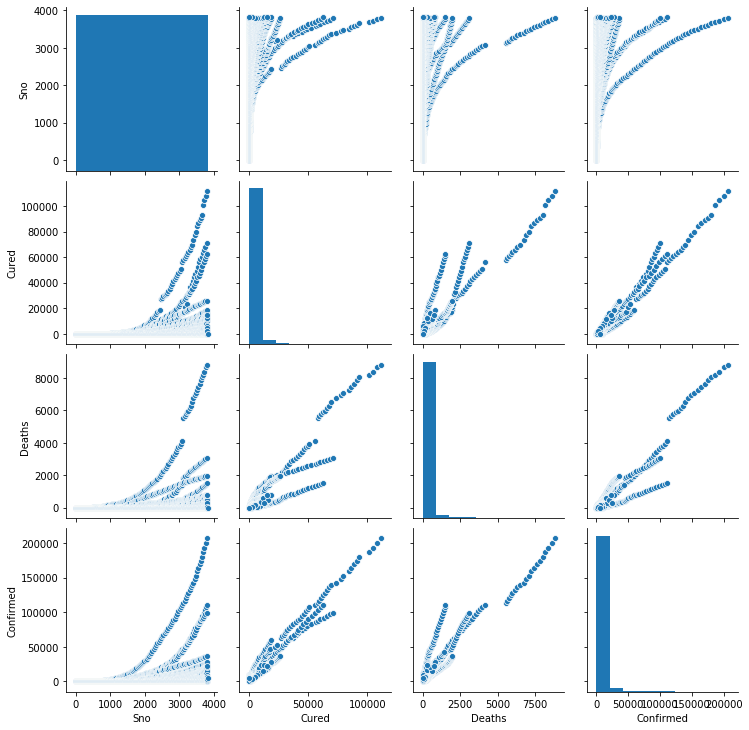

In [719]:
sns.pairplot(train)

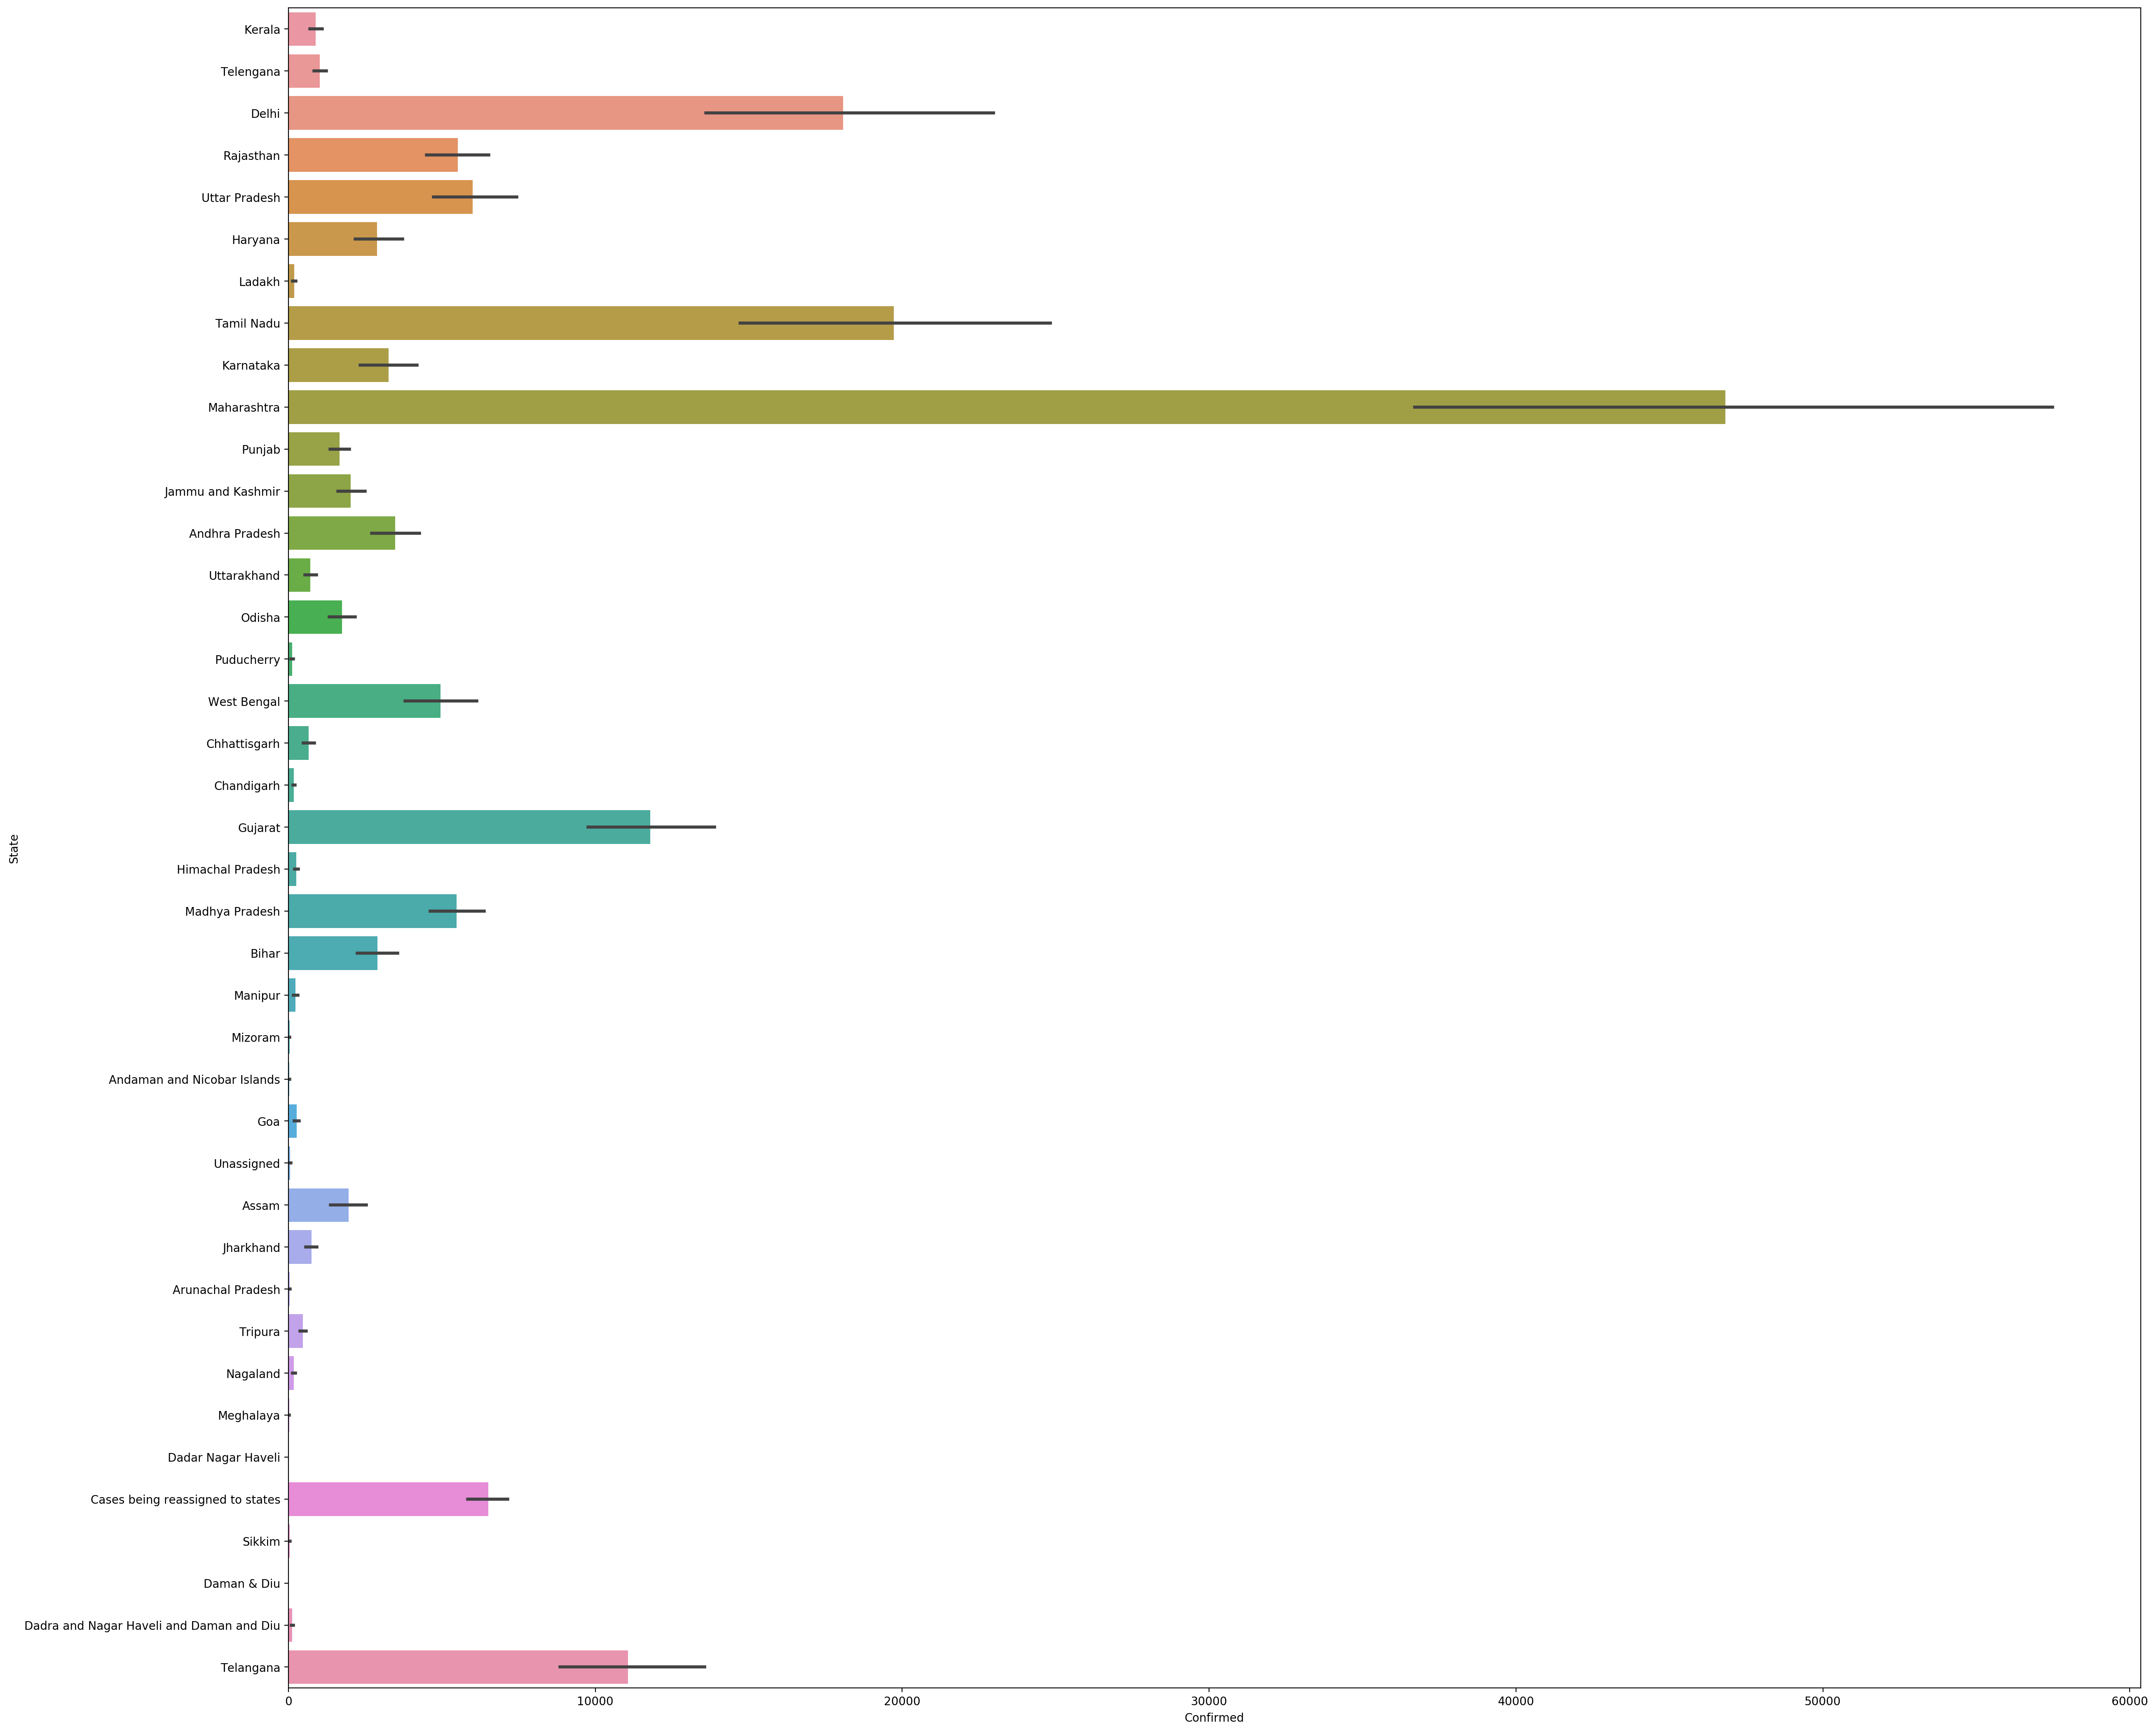

In [720]:
plt.figure(num=None, figsize=(29, 27), dpi=200, facecolor='w', edgecolor='k')
sns.barplot(y='State',x='Confirmed',data=train)

In [721]:



df_grouped=train.groupby(['State']).sum()
df_grouped.Confirmed

State
Andaman and Nicobar Islands                    3562
Andhra Pradesh                               406739
Arunachal Pradesh                              4256
Assam                                        189860
Bihar                                        310031
Cases being reassigned to states             312487
Chandigarh                                    20059
Chhattisgarh                                  72789
Dadar Nagar Haveli                              186
Dadra and Nagar Haveli and Daman and Diu       3209
Daman & Diu                                       2
Delhi                                       2294798
Goa                                           27652
Gujarat                                     1285959
Haryana                                      361911
Himachal Pradesh                              27835
Jammu and Kashmir                            243205
Jharkhand                                     73348
Karnataka                                    391093
Kerala

In [722]:
plot=df_grouped.nlargest(5,'Confirmed')
plot

,Sno,Cured,Deaths,Confirmed
State,,,,
Maharashtra,211989,2548373,232537,5618635
Tamil Nadu,213075,1285742,27007,2406960
Delhi,211124,1215763,69051,2294798
Gujarat,209446,782201,76328,1285959
Uttar Pradesh,213661,447713,20756,750180


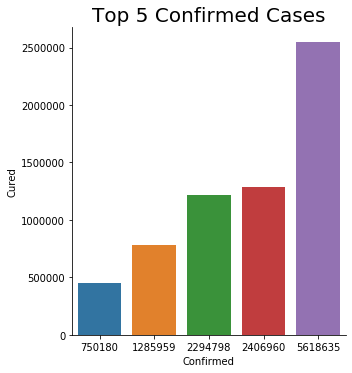

In [723]:
sns.catplot(y='Cured',x='Confirmed',height=5,aspect=1,kind='bar',data=plot)
plt.title('Top 5 Confirmed Cases',size=20)
plt.show()

In [724]:
da=pd.to_datetime(train['Date'],errors='coerce')
train['Date']=da.dt.strftime("%Y%m%d").astype(int)

da=pd.to_datetime(test['Date'],errors='coerce')
test['Date']=da.dt.strftime("%Y%m%d").astype(int)

In [725]:
plot=train.nlargest(2000,'Confirmed')
plot.head()

,Sno,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3802,3803,20200607,Maharashtra,-,-,111740,8822,206619
3766,3767,20200507,Maharashtra,-,-,108082,8671,200064
3730,3731,20200407,Maharashtra,-,-,104687,8376,192990
3694,3695,20200307,Maharashtra,-,-,101172,8178,186626
3658,3659,20200207,Maharashtra,-,-,93154,8053,180298


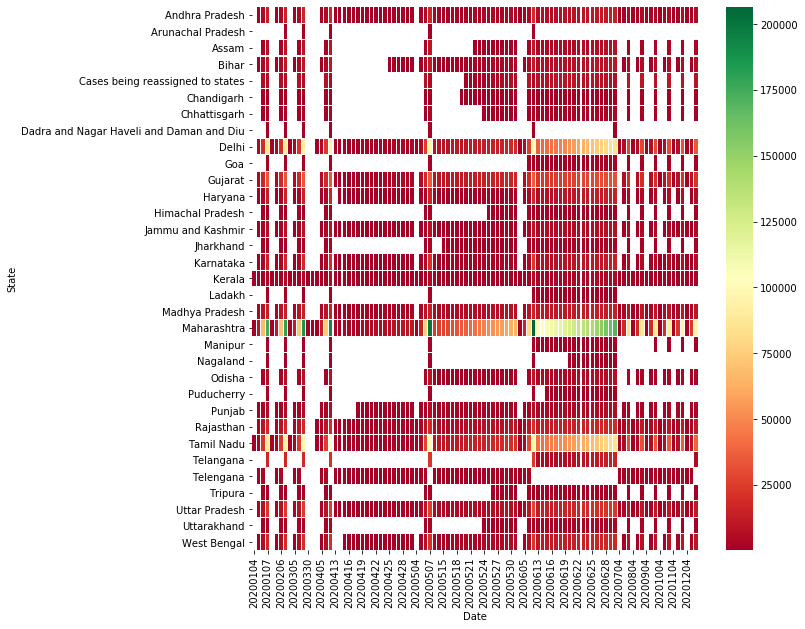

In [726]:
#Heatmap
fig, ax=plt.subplots(figsize=(10,10))
h=pd.pivot_table(plot,values='Confirmed',
                index=['State'],columns='Date')
sns.heatmap(h,cmap="RdYlGn",linewidths=0.05)

In [727]:
train.select_dtypes(include=['object']).columns

Index(['State', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], dtype='object')

In [728]:
test.select_dtypes(include=['object']).columns

Index(['State'], dtype='object')

In [729]:
l=LabelEncoder()
X=train.iloc[:,0].values
train.iloc[:,0]=l.fit_transform(X.astype(str))
x=train.iloc[:,4].values
train.iloc[:,4]=l.fit_transform(X)

In [730]:
l=LabelEncoder()
X=test.iloc[:,0].values
test.iloc[:,0]=l.fit_transform(X.astype(str))
x=test.iloc[:,4].values
test.iloc[:,4]=l.fit_transform(X)

In [731]:
train.head()

,Sno,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,0,20200130,Kerala,1,0,0,0,1
1,1111,20200131,Kerala,1,1111,0,0,1
2,2222,20200102,Kerala,2,2222,0,0,2
3,3153,20200202,Kerala,3,3153,0,0,3
4,3264,20200302,Kerala,3,3264,0,0,3


In [732]:
test.head()

,Snos,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,0,20200108,Himachal Pradesh,1,0,0,0,NaN
1,11,20190208,Himachal Pradesh,1,11,0,0,NaN
2,22,20200308,Himachal Pradesh,2,22,0,0,NaN
3,23,20200408,Himachal Pradesh,3,23,0,0,NaN
4,24,20200508,Himachal Pradesh,3,24,0,0,NaN


In [733]:
train=train.drop(columns=['State','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'])
test=test.drop(columns=['State','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths','Confirmed'])

In [734]:
y_train=train['Confirmed']
x_train=train.drop(['Confirmed'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [735]:
pip=Pipeline([('scaler2',StandardScaler()),
              ('RandomForestRegressor:',RandomForestRegressor())])
pip.fit(x_train,y_train)
prediction=pip.predict(x_test)


In [736]:
acc=pip.score(x_test,y_test)
acc


-0.3668340946541884

In [737]:
predict=pip.predict(test)

In [742]:
#Precidtion for given CSV
output=pd.DataFrame({'Date':FID,'Confirmed':predict})
output.head()

,Date,Confirmed
0,20200108,342.93
1,20190208,472.76
2,20200308,184.41
3,20200408,826.05
4,20200508,489.39


In [749]:
#Classifire
class NaiveBayes:
    def __init__(self,f,r):
        self.features = f
        self.response = r

    def predicts(self,cutcase):
        anskeys = list(self.response.keys())
        ansvalues = dict.fromkeys(anskeys,())
        for key in anskeys:
            ansvalues[key] = self.response[key]
            for ikey, ival in cutcase.items():
                ansvalues[key] = ansvalues[key] * self.features[ikey][ival][key]
        print(ansvalues)
        maxkey=""
        maxans=-1
        for ikey, ival in ansvalues.items():
            if ival > maxans:
                maxans = ival
                maxkey = ikey
        return maxkey

response = {"Severe":0.7, "Alarming":0.6,"Moderate":0.5,"Mild":0.2}
features = {
        "Cough":
                    {
                        "Yes" : {"Severe":0.8, "Alarming":0.7,"Moderate":0.6,"Mild":0.2},
                        "No" : {"Severe":0.1, "Alarming":0.2,"Moderate":0.3,"Mild":0.8}
                    },
        "Cold":
                    {
                        "Yes" : {"Severe":0.8, "Alarming":0.7,"Moderate":0.6,"Mild":0.2},
                        "No" : {"Severe":0.1, "Alarming":0.2,"Moderate":0.3,"Mild":0.8}                    },
        "Fever":
                    {
                        "Yes" : {"Severe":0.8, "Alarming":0.7,"Moderate":0.6,"Mild":0.2},
                        "No" : {"Severe":0.1, "Alarming":0.2,"Moderate":0.3,"Mild":0.8}
                    },
        "Headache":
                    {
                        "Yes" : {"Severe":0.8, "Alarming":0.7,"Moderate":0.6,"Mild":0.2},
                        "No" : {"Severe":0.1, "Alarming":0.2,"Moderate":0.3,"Mild":0.8}
                    }
}
nb = NaiveBayes(features, response)
cog = input("Cough?(Yes/No):")
cod = input("Cold?(Yes/No):")
head = input("Fever?(Yes/No):")
fav = input("Headache?(Yes/No):")


custcase = {"Cough":cog, "Fever":cod,"Cold":head,"Headache":fav}
print("Your Condition is :",nb.predicts(custcase))



Cough?(Yes/No):No
Cold?(Yes/No):Yes
Fever?(Yes/No):No
Headache?(Yes/No):Yes
{'Severe': 0.0044800000000000005, 'Alarming': 0.011759999999999998, 'Moderate': 0.0162, 'Mild': 0.005120000000000002}
Your Condition is : Moderate


NameError: name 'SavGuage' is not defined